# Phân tích và Huấn luyện mô hình Random Forest

Trong notebook này, chúng ta sẽ:
1. Tạo dữ liệu mẫu
2. Tiền xử lý dữ liệu
3. Huấn luyện mô hình Random Forest
4. Đánh giá mô hình

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

## 1. Tạo dữ liệu mẫu

In [2]:
# Tạo dữ liệu mẫu với 1000 mẫu và 20 đặc trưng
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, random_state=42)

# Chuyển đổi thành DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
df['target'] = y

# Hiển thị 5 dòng đầu tiên
print("Dữ liệu mẫu:")
display(df.head())

# Thống kê cơ bản
print("\nThống kê cơ bản:")
display(df.describe())

Dữ liệu mẫu:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,-4.906442,3.442789,0.558964,-0.976764,-1.568805,-4.271982,-3.727921,0.111868,2.119795,-2.522812,...,-7.492478,4.264669,0.304866,0.777693,-9.375464,1.654446,3.012859,-4.497003,-2.520066,0
1,2.162610,-5.286651,2.609846,-1.803898,-1.831216,1.450757,2.648709,2.152307,0.524552,0.493548,...,6.680603,-2.431830,2.462773,-1.254824,2.978402,-3.428457,-4.562178,3.698665,-1.923286,1
2,-4.784844,-3.744827,4.657592,-1.408806,-5.444758,-2.416013,3.556495,-1.572119,-0.730549,3.447661,...,7.961059,-5.151105,0.473131,-4.070667,-0.932309,-3.230768,-7.844646,2.803798,-2.963189,1
3,10.465024,1.070944,-3.562432,-0.849062,2.183860,-0.609893,0.946327,-1.046141,-2.057053,-2.056650,...,-1.449095,-1.217685,2.026805,2.121829,3.184256,-1.960146,0.782147,-1.444202,0.915985,0
4,5.599516,-1.776412,-1.304322,-0.720074,5.859373,-3.292432,3.152205,7.099882,-3.321076,3.245486,...,6.608729,5.632297,-1.943748,1.169455,3.782513,-4.752822,-7.577624,4.868025,1.708210,0



Thống kê cơ bản:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.423294,2.006591,0.395558,-0.540912,0.461507,-0.538549,0.554395,0.458231,-0.140578,-0.382222,...,0.190948,-0.059679,-0.764689,0.106819,-1.654116,-0.470160,-1.361740,-0.167763,-0.030887,0.498000
std,5.772147,5.034043,2.430171,2.274880,2.528174,2.278681,2.120906,2.235937,2.509818,2.507247,...,5.347144,2.531984,2.812868,2.447394,5.423482,2.329450,5.322205,2.681488,2.822472,0.500246
min,-15.683735,-16.725007,-8.459430,-7.456052,-9.944086,-8.233342,-6.017109,-5.791332,-7.429074,-9.479867,...,-19.961917,-9.628862,-9.456710,-9.032351,-16.962509,-8.517900,-17.152185,-7.325703,-7.922346,0.000000
25%,-3.655086,-0.979035,-1.072519,-2.111310,-1.063989,-1.993995,-0.805943,-1.038123,-1.985096,-2.123342,...,-3.546376,-1.837091,-2.707939,-1.597581,-5.550747,-2.088356,-5.071142,-1.908853,-2.085382,0.000000
50%,0.353793,2.321397,0.463736,-0.607192,0.536008,-0.496739,0.538348,0.445576,-0.178519,-0.446630,...,0.657070,0.038068,-0.822740,0.255420,-1.785180,-0.441172,-1.463695,-0.139871,-0.118422,0.000000
75%,4.680916,5.316025,2.034754,0.979168,2.196869,0.963986,1.915909,1.857896,1.585003,1.357026,...,4.140014,1.709011,1.058387,1.723033,2.130080,1.150605,2.043051,1.538539,1.839859,1.000000
max,18.704731,16.985102,7.300535,7.460633,8.667679,6.511036,7.499632,7.921624,7.812906,7.209773,...,15.699470,9.541978,8.592254,9.087184,15.497786,6.699206,15.741781,7.829233,8.459108,1.000000


## 2. Tiền xử lý dữ liệu

In [3]:

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")

Kích thước tập train: (800, 20)
Kích thước tập test: (200, 20)


## 3. Huấn luyện mô hình Random Forest

In [4]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập test 
y_pred = rf_model.predict(X_test_scaled)

# In báo cáo phân loại
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       106
           1       0.88      0.91      0.90        94

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



## 4. Đánh giá mô hình

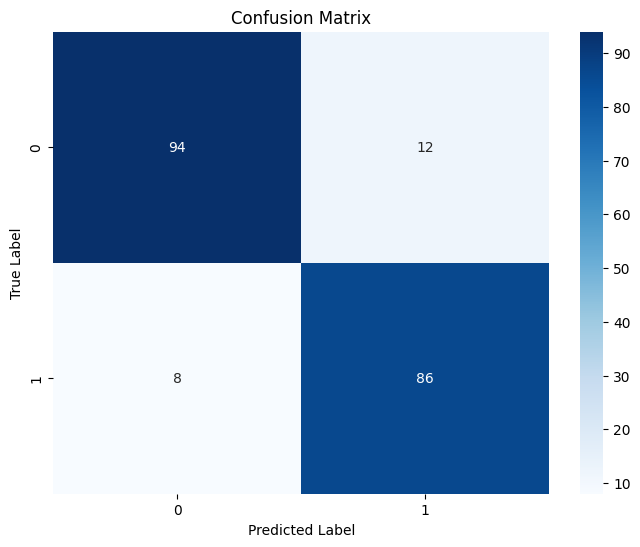

In [5]:
# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

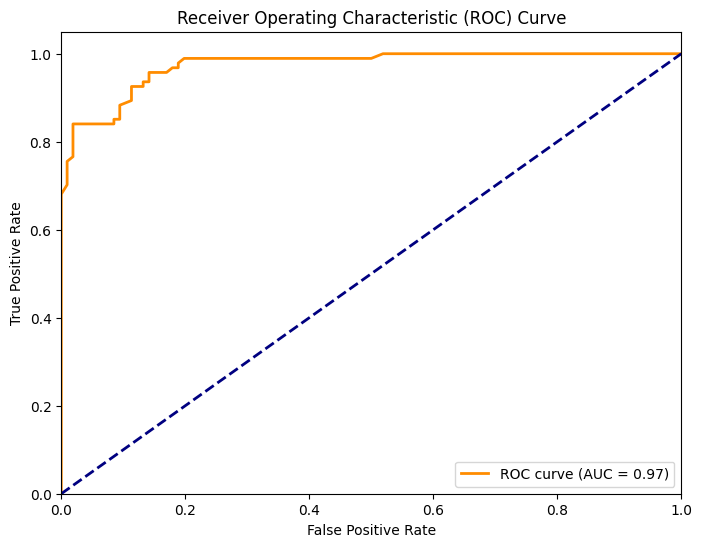

In [6]:
# Vẽ ROC curve
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

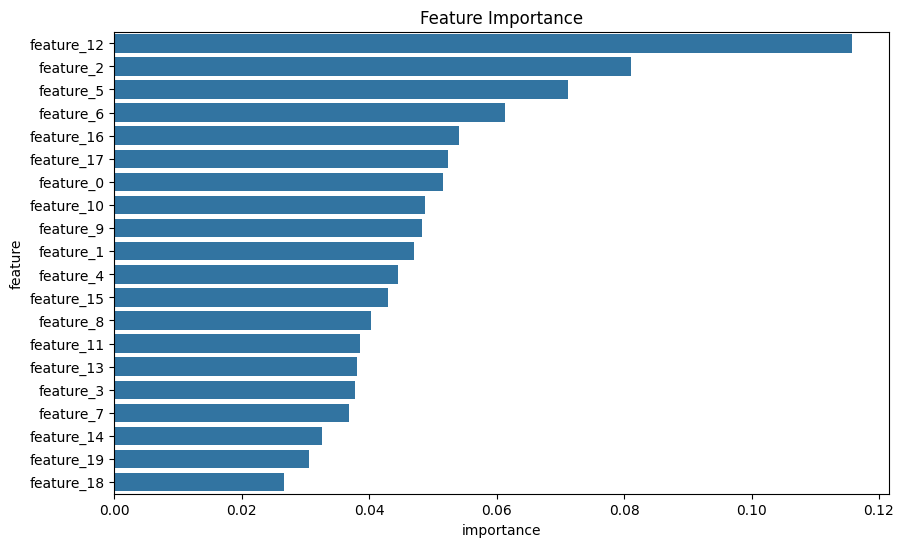

In [7]:
# Hiển thị feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()